**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**
# Independent Component Analysis (ICA)

Independent Component Analysis (ICA) is a statistical technique used to separate a multivariate signal into additive subcomponents that are statistically independent of each other. It's often used for "blind source separation," where you want to recover original signals that have been mixed together without knowing how they were mixed.

## Core Idea:

Imagine a "cocktail party" where multiple people are talking simultaneously. Each microphone in the room records a mixture of all the voices. ICA aims to "unmix" these recordings to isolate each individual's voice.

## Key Assumptions:

*   **Statistical Independence:** The original source signals are statistically independent of each other. This is the most important assumption.
*   **Linear Mixture:** The observed mixed signals are linear combinations of the original source signals.
*   **Non-Gaussianity:** The source signals are non-Gaussian (they don't follow a normal distribution). This is crucial for ICA to work.

## How it Works (Simplified):

Mathematically, the mixing process can be represented as:

$$
X = AS
$$

Where:

*   $X$ is the matrix of observed mixed signals.
*   $S$ is the matrix of independent source signals (what we want to recover).
*   $A$ is the mixing matrix (how the sources were combined).

ICA's goal is to find a matrix $W$ (the unmixing matrix) such that:

$$
S = WX
$$

This $W$ effectively "undoes" the mixing process and allows us to estimate the original source signals $S$.

## Differences between PCA and ICA:

| Feature             | PCA                                   | ICA                                         |
|----------------------|----------------------------------------|---------------------------------------------|
| Goal                 | Find directions of maximum variance    | Find statistically independent components     |
| Assumption           | Uncorrelated components                | Statistically independent and non-Gaussian components |
| Applicability       | Dimensionality reduction, noise removal | Blind source separation, feature extraction |

## When to Use ICA:

*   **Blind Source Separation:** Separating mixed audio signals (like in the cocktail party problem), separating brain signals from EEG recordings, or separating mixed financial time series.
*   **Feature Extraction:** In some cases, ICA can be used for feature extraction, especially when the underlying data is believed to be generated by independent sources.

## Important Notes:

*   ICA assumes that the source signals are statistically independent and non-Gaussian.
*   ICA works best when the number of observed signals is greater than or equal to the number of source signals.
*   The order and scaling of the recovered source signals might not be the same as the original sources. ICA recovers the sources up to permutation and scaling.

The ICA Algorithm (Simplified):

**There are several algorithms for performing ICA, but they generally involve the following steps:**

**Centering:** Subtract the mean from each observed signal to make them zero-mean.

**Whitening (Optional but often used):** Transform the data to make it uncorrelated and have unit variance. This simplifies the ICA problem. PCA is often used for this whitening step.

**Finding the Unmixing Matrix:** This is the core of ICA. Different algorithms use different approaches, such as:

**Maximizing Non-Gaussianity:** By maximizing a measure of non-Gaussianity (like kurtosis or negentropy), ICA tries to find the directions in the data space that correspond to the independent sources.

**Minimizing Mutual Information:** ICA can also be formulated as minimizing the mutual information between the estimated source signals.

In [ ]:
# Install necessary libraries
!pip install numpy scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [2]:
# --- 1. Generate Sample Data (Mixed Signals) ---
np.random.seed(0)  # For reproducibility

# Number of samples and sources
n_samples = 2000
time = np.linspace(0, 8, n_samples)


In [3]:
# Create three different source signals
s1 = np.sin(2 * time)  # Sine wave
s2 = np.sign(np.sin(3 * time))  # Square wave
s3 = np.random.normal(size=n_samples)  # Random noise

In [4]:

S = np.c_[s1, s2, s3]  # Stack the sources horizontally
S /= S.std(axis=0)  # Standardize each source

In [5]:
# Mix the sources using a random mixing matrix
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A)  # Mixed signals (observations)

In [6]:
# --- 3. Visualize the Results ---
def plot_signals(signals, titles, figsize=(12, 8)):
    """Plots signals in subplots."""
    plt.figure(figsize=figsize)
    n_signals = signals.shape[1]
    for i in range(n_signals):
        plt.subplot(n_signals, 1, i + 1)
        plt.plot(signals[:, i])
        plt.title(titles[i])
    plt.tight_layout()
    plt.show()

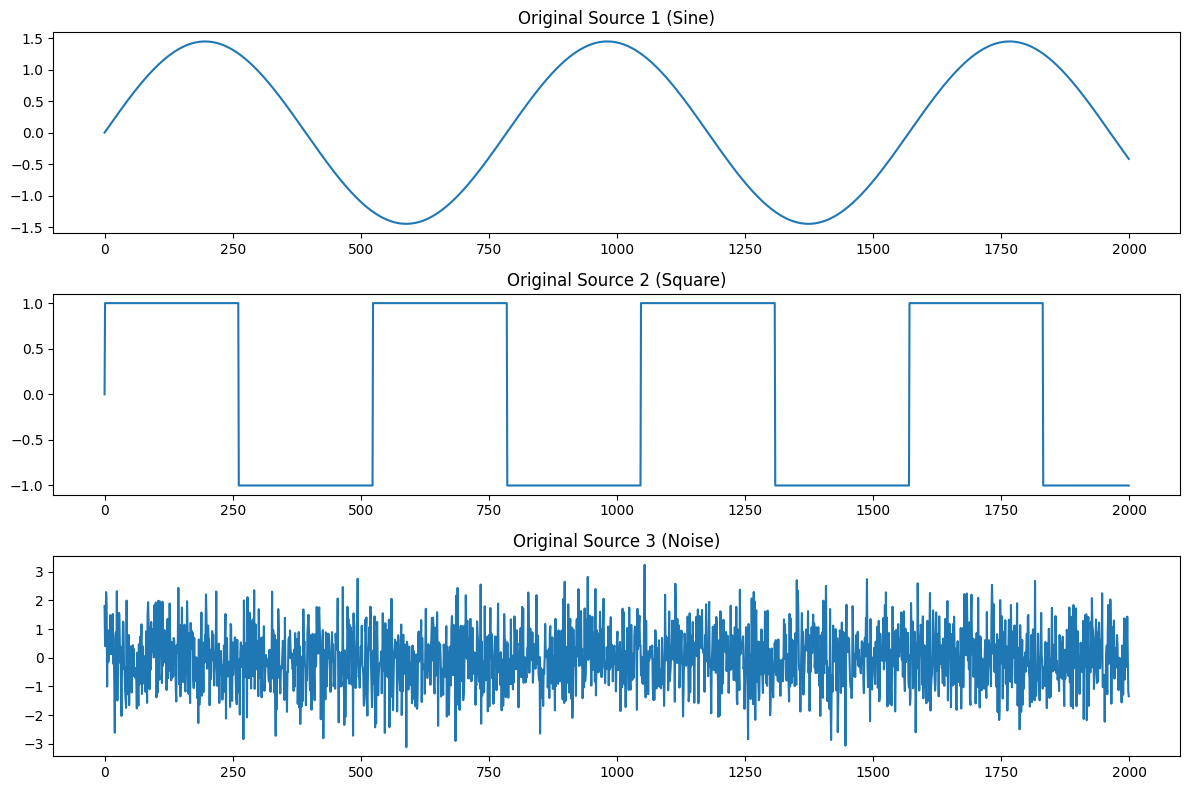

In [7]:
# Plot the original sources
plot_signals(S, ["Original Source 1 (Sine)", "Original Source 2 (Square)", "Original Source 3 (Noise)"])

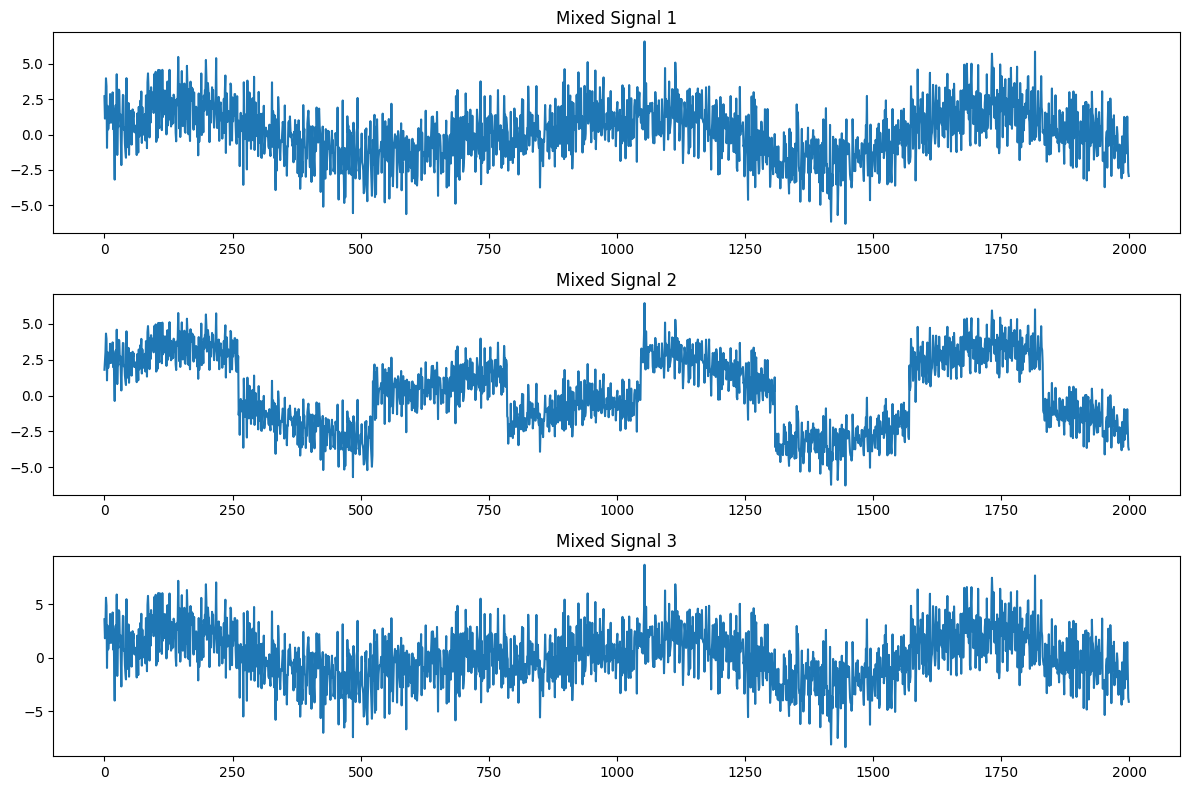

In [8]:
# Plot the mixed signals
plot_signals(X, ["Mixed Signal 1", "Mixed Signal 2", "Mixed Signal 3"])

In [13]:
# --- 2. Perform ICA ---
ica = FastICA(n_components=3, random_state=0)  # Initialize ICA
S_recovered = ica.fit_transform(X)  # Apply ICA to recover sources

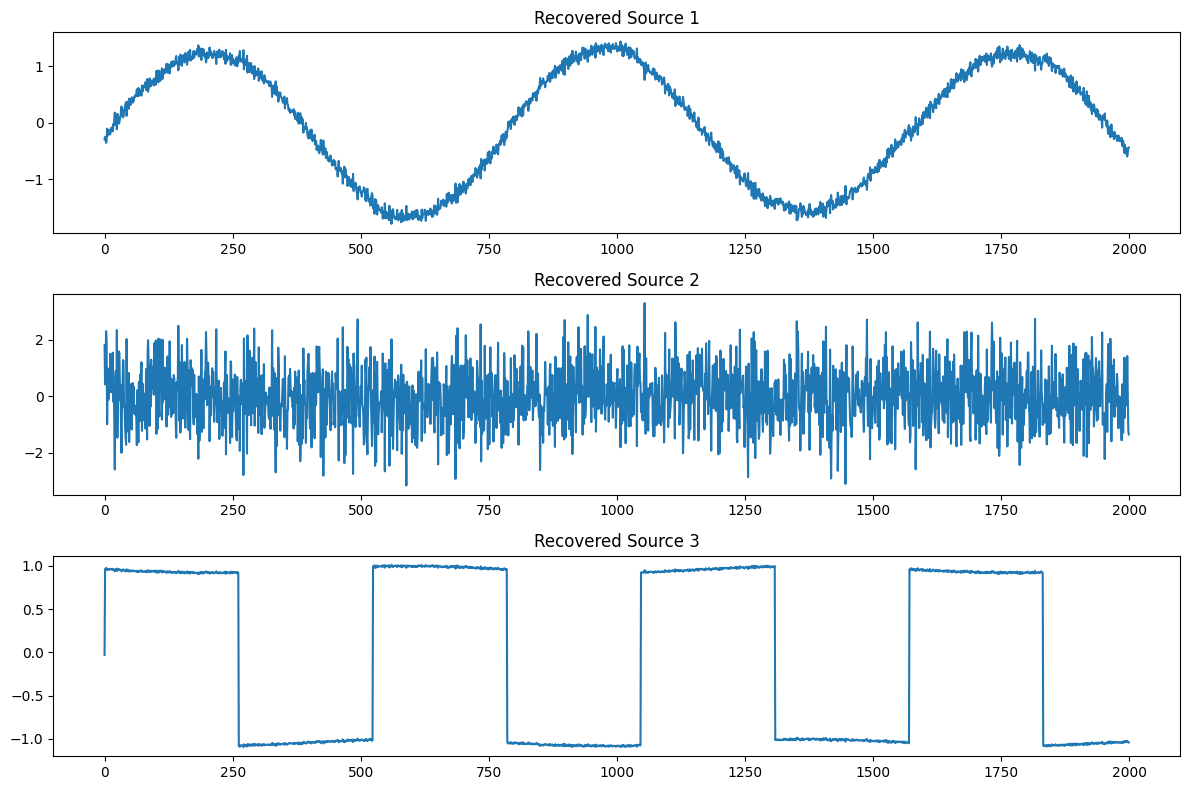

In [14]:
# Plot the recovered sources
plot_signals(S_recovered, ["Recovered Source 1", "Recovered Source 2", "Recovered Source 3"])

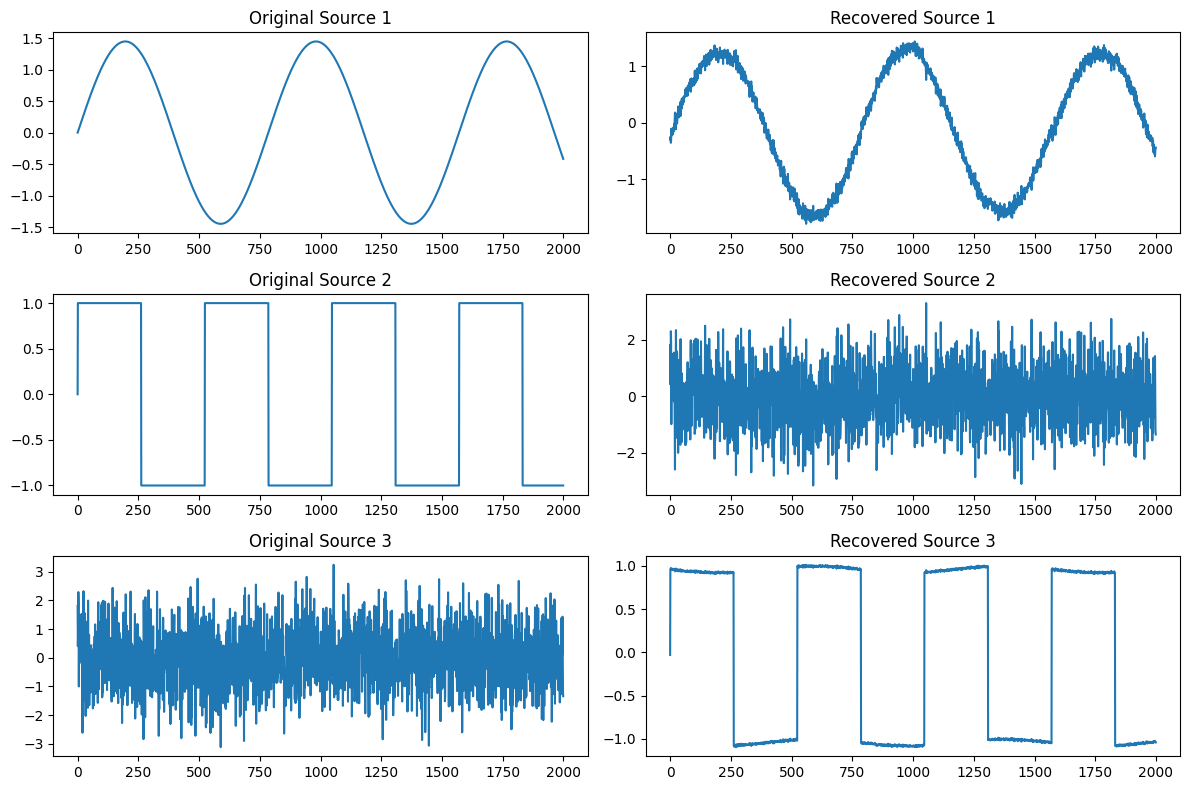

In [15]:
# --- 4. Compare the Permutation and Scaling ---
# ICA recovers the sources up to permutation and scaling. Let's visualize how the recovered sources align with the original ones.

def plot_comparison(S, S_recovered):
  """Plots the original and recovered sources for comparison."""
  plt.figure(figsize=(12, 8))
  for i in range(3):
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(S[:, i])
    plt.title(f"Original Source {i+1}")
    plt.subplot(3, 2, 2*i + 2)
    plt.plot(S_recovered[:, i])
    plt.title(f"Recovered Source {i+1}")
  plt.tight_layout()
  plt.show()

plot_comparison(S, S_recovered)


## Code Explanation:

The Python code performs the following steps:

1.  **Generates Sample Data:** Creates three independent source signals: a sine wave, a square wave, and random noise.
2.  **Mixes the Signals:** Combines the source signals using a random mixing matrix `A` to simulate a real-world scenario where signals are mixed together.
3.  **Applies ICA:** Uses the `FastICA` algorithm to attempt to recover the original source signals from the mixed signals.
4.  **Visualizes the Results:** Plots the original source signals, the mixed signals, and the recovered signals using subplots.
5.  **Compares Original and Recovered Signals:** Creates a comparison plot to visually demonstrate how ICA recovers the signals up to permutation and scaling (the order and amplitude of the recovered signals might be different from the originals, but the shapes are preserved).


## Conclusion:

This example provides a clearer demonstration of how ICA works and how to use it in practice. The plots clearly show the original sources, the mixed signals, and the recovered sources, illustrating the power of ICA for blind source separation. The comparison plot makes it easy to see the permutation and scaling aspect of ICA's output.